In [1]:
%matplotlib inline 
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

In [2]:
# 数据集样本数为1000，输入个数为2，给定随机生成的批量样本特征X （1000 *2）
# y = Xw +b +e

In [3]:
num_inputs = 2
num_example = 1000
true_w = [2,-3.4]
true_b = 4.2
features = nd.random.normal(scale=1,shape=(num_example,num_inputs))
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += nd.random.normal(scale=0.01,shape=labels.shape)

In [4]:
features[0],labels[0]

(
 [1.1630787 0.4838046]
 <NDArray 2 @cpu(0)>, 
 [4.879625]
 <NDArray 1 @cpu(0)>)

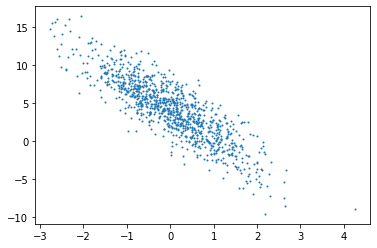

In [5]:
plt.scatter(features[:,1].asnumpy(), labels.asnumpy(),1)

In [7]:
def data_iter(batch_size, features, labels):
    nunm_examples = len(features)
    indices = list(range(num_example))
    random.shuffle(indices)
    for i in range(0,num_example, batch_size):
        j = nd.array(indices[i:min(i+batch_size,num_example)])
        yield features.take(j), labels.take(j) # take 根据索引返回对映的元素
    

In [8]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    break


[[ 0.347244    0.6383554 ]
 [-0.01741523 -1.3121095 ]
 [ 1.3990062  -0.07578988]
 [ 0.19110449 -1.5007205 ]
 [-0.7687952   1.3430316 ]
 [ 0.68650365  2.0535662 ]
 [-0.11884538 -0.6705451 ]
 [ 0.5787536  -0.9676371 ]
 [-0.64645016  0.8603265 ]
 [ 0.01851517  1.1809815 ]]
<NDArray 10x2 @cpu(0)> 
[ 2.7228804   8.642933    7.2620707   9.683764   -1.8869959  -1.4055421
  6.267011    8.667332   -0.03009245  0.22673813]
<NDArray 10 @cpu(0)>


#### 初始化模型参数

In [9]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [10]:
w.attach_grad()
b.attach_grad()

#### 定义模型

In [11]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

In [12]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 /2

In [13]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr*param.grad / batch_size

    多次迭代模型参数，每次迭代中，根据当前读取的小批量数据样本，通过调用反向函数backward计算小批量梯度，调用优化算法sgd迭代模型参数，由于之前batch_size= 10 每个小批量的损失l的形状为（10，1）。由于变量l并不是标亮，运行l.backward()将对l中元素求和得到新的变量，在求该变量有关模型参数的变量

In [15]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features, labels):
        with autograd.record():
            l = loss(net(X, w, b),y)
        l.backward()
        sgd([w, b],lr, batch_size)
        
    train_l = loss(net(features, w, b), labels)
    print("epoch %d, loss %f"%(epoch+1, train_l.mean().asnumpy()))

epoch 1, loss 0.035097
epoch 2, loss 0.000131
epoch 3, loss 0.000048


In [16]:
true_w, w

([2, -3.4], 
 [[ 1.9995552]
  [-3.399838 ]]
 <NDArray 2x1 @cpu(0)>)

In [17]:
true_b, b

(4.2, 
 [4.199794]
 <NDArray 1 @cpu(0)>)